['', '', '', '', '|', 'l', 'fo', 'Go', '|', '', 'nd', '', 'ia', 'เ', '”', 'เ', 'a', '|', '', 'GB', 'ข้', 'อ', 'ม', 'ู', 'ล', 'ส', '่', 'ว', 'น', 'ต', 'ั', 'ว', '', 'ค', 'ํ', 'า', 'น', 'ํ', 'า', 'ห', 'น', '้', 'า', '', '๐', 'น', 'า', 'ย', '0', '๐', 'น', 'า', 'ง', '0', '๐', 'น', 'า', 'ง', 'ส', 'า', 'ว', '', 'ชื', '่', 'อ', '-', 'น', 'า', 'ม', 'ส', 'ก', 'ุ', 'ล', '*', '', 'ว', 'ั', 'น', '/', 'เ', 'ด', 'ื', 'อ', 'น', '/', 'ป', 'ี', 'เก', 'ิ', 'ด', '(ค', '.', 'ศ', '.)', '*', 'เล', 'ขบ', 'ั', 'ต', 'ร', 'ป', 'ร', 'ะ', 'จ', 'ํ', 'า', 'ต', 'ั', 'ว', 'ป', 'ร', 'ะ', 'ชา', 'ชน', '[ใส', '่', 'เฉ', 'พ', 'า', 'ะ', 'ต', 'ั', 'ว', 'เล', 'ข', ']', '*', '', '9', 'ส', 'ถา', 'น', 'ท', 'ี', 'ป', 'ั', 'จ', 'จ', 'ุ', 'บ', 'ั', 'น', 'ท', 'ี', 'ส', 'า', 'ม', 'า', 'ร', 'ถ', 'ต', 'ิ', 'ด', 'ต', '่', 'อ', 'แล', 'ะ', 'จ', 'ั', 'ด', 'ส', '่', 'ง', 'เอ', 'ก', 'ส', 'า', 'ร', '', 'ชื', '่', 'อ', 'ส', 'ถา', 'น', 'ท', 'ี', '่', 'ห', '้', 'อ', 'ง', '/', 'ช', 'ั', '้', 'น', 'เล', 'ข', 'ท', 'ี', '่', '*', '', 'ห', 'ม', 'ู',

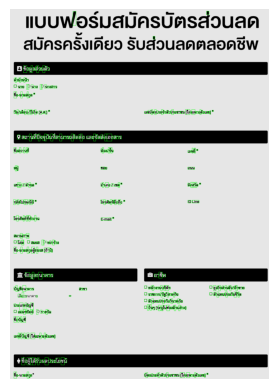

In [ ]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from pytesseract import Output

img = cv2.imread("form_image/4.jpg")
h, w, c = img.shape
resized = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
thresh, im_bw = cv2.threshold(gray, 180, 230, cv2.THRESH_BINARY)

boxes_img = cv2.cvtColor(im_bw, cv2.COLOR_BGR2RGB)

d = pytesseract.image_to_data(boxes_img, config=r'-l tha+eng --oem 3 --psm 6 --dpi 2400',output_type=Output.DICT)
print(d['text'])

n_boxes = len(d["text"])

for i in range(n_boxes):
    if int(float(d["conf"][i])) > 60:
        (x, y, w, h) = (d["left"][i], d["top"][i], d["width"][i], d["height"][i])
        boxes_img = cv2.rectangle(boxes_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imwrite('output.jpg',boxes_img)
plt.imshow(boxes_img)
plt.axis("off")
plt.show()

In [83]:
custom_config = r'-l tha+eng --oem 3 --psm 6 --dpi 2400'
data = pytesseract.pytesseract.image_to_string(cv2.cvtColor(im_bw, cv2.COLOR_BGR2RGB), config=custom_config)
# data = pytesseract.pytesseract.image_to_string(boxes_img, config=custom_config)
print(data)

|              l                        fo                      Go                         |
nd
ia                         เ          ”                     เ             a                                                                |
GB ข้อมูลส่วนตัว
คํานําหน้า
๐ นาย 0๐ นาง 0๐ นางสาว
ชื่อ-นามสกุล *
วัน/เดือน/ปีเกิด (ค.ศ.) *                                                                          เลขบัตรประจําตัวประชาชน [ใส่เฉพาะตัวเลข] *
9 สถานทีปัจจุบันทีสามารถติดต่อ และจัดส่งเอกสาร
ชื่อสถานที่                                                        ห้อง/ชั้น                                                          เลขที่ *
หมู่                                                                ซอย                                                               ถนน
แขวง / ตําบล *                                                 อําเภอ / เขต *                                                  จังหวัด *
รหัสไปรษณีย์ *                                                   โทรศัพท์มือถือ *         